#SHAP & SHAP Heatmap
##SHAP

Input:

> model class and setting

> model.pt

> X_train.npy : training data

> test.npy : test data from pred_preprocessing

Output:
> shap_calculator()
>> shap.npy: All SHAP values (output_num, data_num, sequence_num, feature_num)


##SHAP Heatmap

Input:

> shap.npy: All SHAP values (output_num, data_num, sequence_num, feature_num)

Output:
> shap_feature_sequence()
>> Picture of the heatmap by feature and sequence, and the percentage of each feature

> shap_feature_data()
>> Picture of the heatmap by feature and data

> shap_feature_detail()
>> Picture of the heatmap by feature and detail, and the percentage of each feature in each detail

> shap_data_sequence()
>> Picture of the heatmap by data and sequence

> shap_detail_sequence()
>> Pictures of the heatmap by detail_max and sequence, detail_min and sequence, detail and sequence


In [1]:
!pip install shap
import shap
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.nn import functional as F

# below is for loading data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 15.7 MB/s 
Mounted at /content/drive


#SHAP 

Model class and setting for load model

In [2]:
"""
model class, should cpoy from training model
"""
class BiLSTM_layer(nn.Module):
  pass

class DataEncoder(nn.Module):
  pass

class minmax_RuleEncoder(nn.Module):
  pass
    
class outbound_RuleEncoder(nn.Module):
  pass
    
class DataonlyNet(nn.Module):
  pass

class Net(nn.Module):
  pass

In [ ]:
"""
model setting, should cpoy from training model
"""
# merge = 

# input_dim = 
# input_dim_encoder = 
# output_dim_encoder = 
# hidden_dim_encoder = 
# hidden_dim_db = 
# output_dim_encoder = output_dim_encoder
# hidden_dim_encoder = hidden_dim_encoder
# hidden_dim_db = hidden_dim_db
# output_dim = 
# n_layers = 
# use_type=''

# outbound_rule_encoder = outbound_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# minmax_rule_encoder = minmax_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# data_encoder = DataEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)

# if use_type=='no_rule':
#   model = Net(input_dim, output_dim, minmax_rule_encoder, outbound_rule_encoder, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers, merge=merge)
# else:
#   model =DataonlyNet (input_dim, output_dim, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers)

In [6]:
sequence_num = 100

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder_path = 'folderpath'

# put model name, ex: 'model.pt' for load model 
model = torch.load(folder_path + 'modelname')
model.eval()

# put train and test npy(after pred preprocessing) file path, ex: 'test_all.npy', 'test_pkg.npy'
X_train = np.load(folder_path + 'x_train.npy')
X_test = np.load(folder_path + 'test_all.npy') #here is different

In [7]:
"""
SHAP calculator, using SHAP github: https://github.com/slundberg/shap
And save the 'shap.npy' for analysis
"""
def shap_calculator(train, test, filename):
  X_train = torch.tensor(train).to(torch.float32)
  X_test = torch.tensor(test).to(torch.float32)
  print(X_test.shape)
  features = ['Speed', 'Status', 'Frequency']

  #should only something like 100 or 1000 random background samples, not the whole training dataset.
  explainer = shap.DeepExplainer(model, X_train[:100]) 
  shap_values_all = explainer.shap_values(X_test)

  np.save(folder_path+'shap_'+str(filename)+'.npy', shap_values_all)

  X = np.array(shap_values_all).reshape(-1,sequence_num,3) #reshape the data for plot
  print(X.shape)

  shap.summary_plot(X[:, 0, :], X_test[:][:, 0, :], plot_type="bar", feature_names = features, plot_size=(15,5))

torch.Size([50, 100, 3])
(1300, 100, 3)


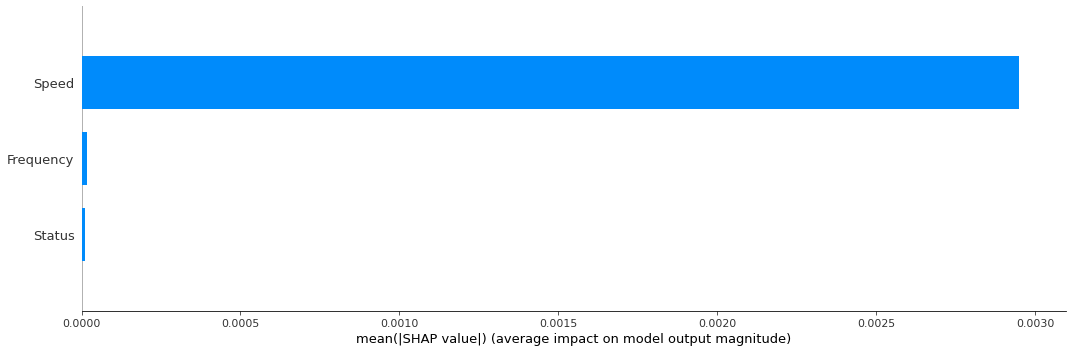

In [10]:
"""
SHAP calculator using 'test_all.npy' for example
"""
X_test = np.load(folder_path + 'test_all.npy') #here is different
X_test = X_test[:50] #For demo, here only use the first 50 data
shap_calculator(X_train, X_test, 'pred')

#SHAP heatmap picture from load data

In [11]:
"""
Calculator each feature SHAP value, and the sum of SHAP value
"""
def shap_feature_calculator(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=0)
  shap_values = np.sum(shap_values, axis=0)

  num = 0
  
  for num in range(len(shap_values)):
    value = shap_values[num]
    values.append(value)

  shap_values_sum = np.sum(shap_value)

  return shap_values_sum

"""
Show the heatmap of feature and sequence
"""
def shap_feature_sequence(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_values_sum = shap_feature_calculator()

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=0)

  plt.figure(figsize=(20,2)) 
  sns.heatmap(shap_values.T, linewidth=0.0,cmap="Blues",yticklabels =['Speed', 'Status', 'Frequency'])
  plt.xlabel("Sequence")
  plt.show()

  for num in range(len(values)):
    value = values[num]/shap_values_sum
    print('Feature {0:10}:   {1:10.5f} %'.format(features[num], value*100))

"""
Show the heatmap of feature and data
"""
def shap_feature_data(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))
  
  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=2)
  shap_values = np.sum(shap_values, axis=0)

  plt.figure(figsize=(20,2)) 
  sns.heatmap(shap_values.T, linewidth=0.0,cmap="Blues",yticklabels =['Speed', 'Status', 'Frequency'])
  plt.xlabel("Data")
  plt.show()

"""
Show the heatmap of feature and detail
"""
def shap_feature_detail(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))
  
  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=1)

  shap_values_add = np.add(shap_values[0:13], shap_values[13:26])

  plt.figure(figsize=(20,2)) 
  sns.heatmap(shap_values_add.T, linewidth=0.0,cmap="Blues", xticklabels=detail, yticklabels =['Speed', 'Status', 'Frequency'])
  plt.xlabel("detail")
  plt.show()

  detail_value_sum = np.sum(shap_values_add, axis=1)

  for i in range(13):
    print("detail"+str(i+1))
    for num in range(3):
      value = shap_values_add[i][num]/detail_value_sum[i]
      print('Feature {0:10}:   {1:10.5f} %'.format(features[num], value*100))

"""
Show the heatmap of data and sequence
"""
def shap_data_sequence(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=3)
  shap_values = np.sum(shap_values, axis=0)

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values, linewidth=0.0,cmap="Blues", yticklabels=False)
  plt.xlabel("Sequence")
  plt.ylabel("Data")
  plt.show()

"""
Show the heatmap of detail and sequence
"""
def shap_detail_sequence(load=True):
  if load:
    folder_path = folder
    file_name = fname
    shap_values_all = np.load(folder_path+str(file_name))

  shap_value = np.array(abs(shap_values_all))
  shap_values = np.sum(shap_value, axis=1)
  shap_values = np.sum(shap_values, axis=2)

  shap_values_add = np.add(shap_values[0:13], shap_values[13:26])

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values[0:13], linewidth=0.0,cmap="Blues", yticklabels=detail)
  plt.xlabel("Sequence")
  plt.ylabel("detail max")
  plt.show()

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values[13:26], linewidth=0.0,cmap="Blues", yticklabels=detail)
  plt.xlabel("Sequence")
  plt.ylabel("detail min")
  plt.show()

  plt.figure(figsize=(20,5)) 
  sns.heatmap(shap_values_add, linewidth=0.0,cmap="Blues", yticklabels=detail)
  plt.xlabel("Sequence")
  plt.ylabel("detail")
  plt.show()

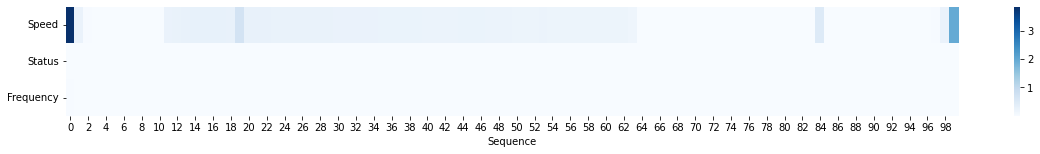

Feature Speed     :     98.60742 %
Feature Status    :      0.58987 %
Feature Frequency :      0.80270 %


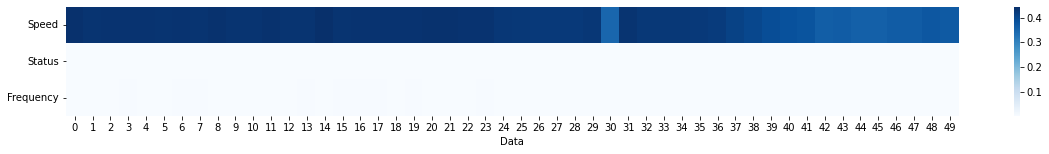

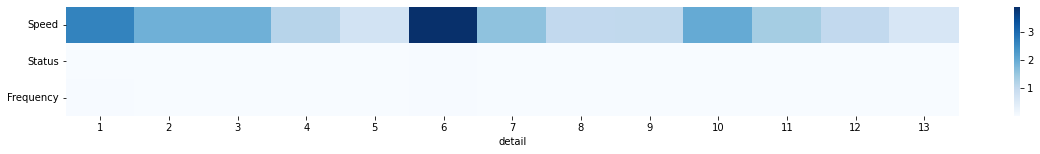

detail1
Feature Speed     :     98.57259 %
Feature Status    :      0.59217 %
Feature Frequency :      0.83524 %
detail2
Feature Speed     :     98.52579 %
Feature Status    :      0.63630 %
Feature Frequency :      0.83791 %
detail3
Feature Speed     :     98.61504 %
Feature Status    :      0.62532 %
Feature Frequency :      0.75964 %
detail4
Feature Speed     :     98.71977 %
Feature Status    :      0.52992 %
Feature Frequency :      0.75031 %
detail5
Feature Speed     :     98.77444 %
Feature Status    :      0.51568 %
Feature Frequency :      0.70988 %
detail6
Feature Speed     :     98.57742 %
Feature Status    :      0.62058 %
Feature Frequency :      0.80200 %
detail7
Feature Speed     :     98.62089 %
Feature Status    :      0.59038 %
Feature Frequency :      0.78873 %
detail8
Feature Speed     :     98.56725 %
Feature Status    :      0.61069 %
Feature Frequency :      0.82206 %
detail9
Feature Speed     :     98.75347 %
Feature Status    :      0.53192 %
Feature Frequency 

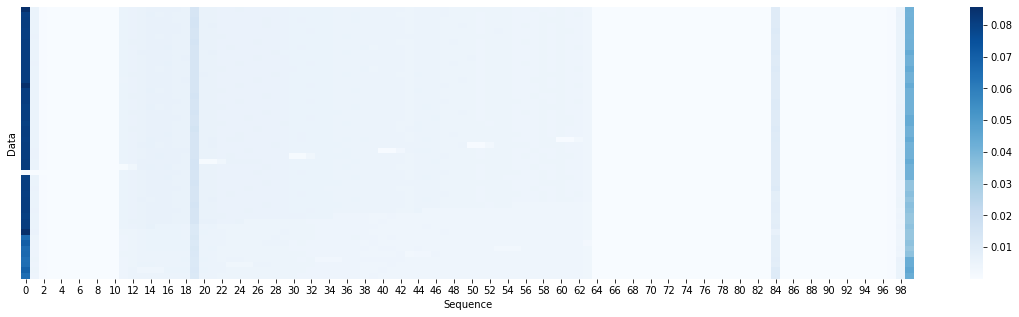

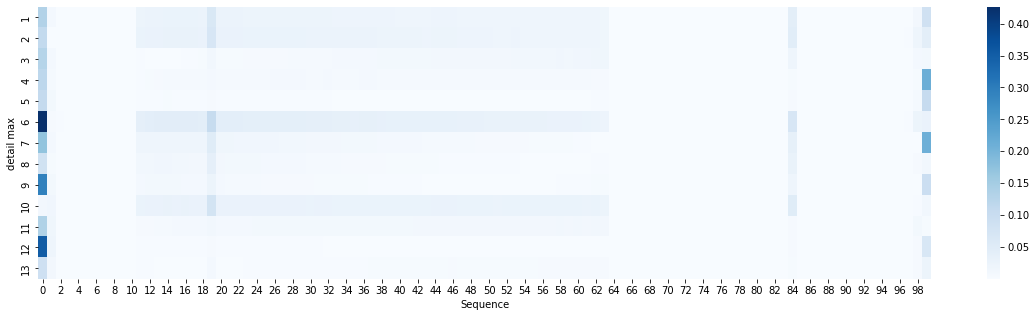

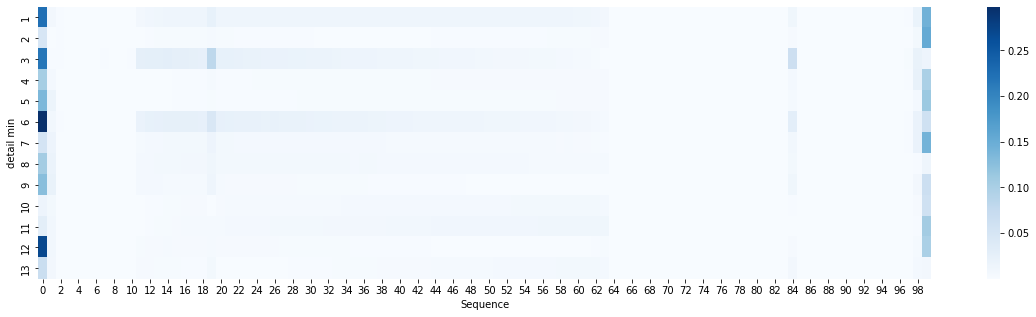

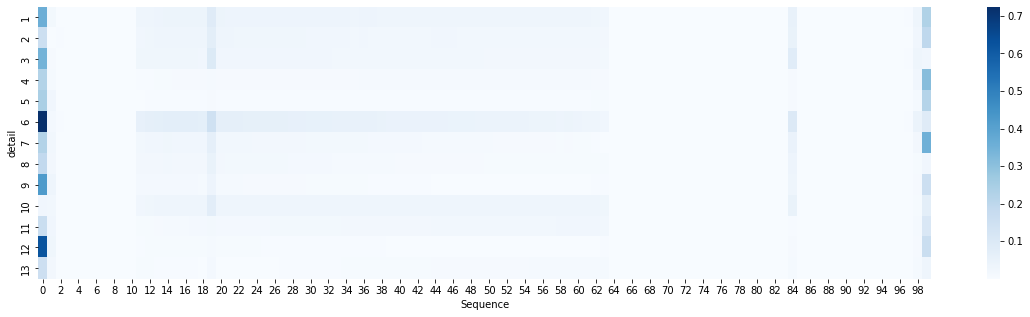

In [13]:
"""
using 'shap_pred.npy' from 'test_all.npy' for example
"""
values = []
shap_values_sum = 0
features = ['Speed', 'Status', 'Frequency']
detail = []
for i in range(1,14):
  detail.append(str(i))

sequence_num = 100

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder = 'folderpath'
# put shap npy file path, ex: 'shap.npy'
fname = 'shap_pred.npy' #here is different
  
shap_feature_sequence(load=True)
shap_feature_data(load=True)
shap_feature_detail(load=True)
shap_data_sequence(load=True)
shap_detail_sequence(load=True)